# IMPORTS

In [72]:
%matplotlib inline

In [73]:
import json
import os
import matplotlib.pyplot as plt
from AxonDeepSeg.testing.segmentation_scoring import *
import pickle

from time import time

In [74]:
from scipy.misc import imread, imsave

# 1) Define the parameters to use for the segmentation

1.1. Set the path of the test image to segment:

In [88]:
path_testing = '../data/'
print(path_testing)

../data/


1.2. Select the trained model you want to use for the segmentation:

In [89]:
model_name = 'default_SEM_model_v1'

1.3. Set the path of the segmentation model:

In [90]:
path_model = '../models/' + model_name

1.4. Read the parameters of the selected model:

In [91]:
path_configfile = path_model + '/config_network.json'

if not os.path.exists(path_model):
    os.makedirs(path_model)

with open(path_configfile, 'r') as fd:
    config_network = json.loads(fd.read())

IOError: [Errno 2] No such file or directory: '../models/default_SEM_model_v1/config_network.json'

# 2) Apply the model to segment an image

2.1. Import the function that performs the segmentation from AxonDeepSeg:

In [79]:
from AxonDeepSeg.apply_model import axon_segmentation

2.2. Launch the segmentation of the image:

In [80]:
prediction = axon_segmentation([path_testing], ["image.png"], path_model, config_network,verbosity_level=3)

Loading acquisitions ...
Rescaling acquisitions to the target resolution ...
Graph construction ...
Beginning inference ...
processing patch 1 on 6
processing patch 2 on 6
processing patch 3 on 6
processing patch 4 on 6
processing patch 5 on 6
processing patch 6 on 6


# 3) Display the segmentation result

3.1. Import sample image and segmentation result:

In [81]:
imorg = imread(path_testing + '/image.png', flatten=True)
imads = imread(path_testing + '/AxonDeepSeg.png', flatten=True)

3.2. Display sample image:

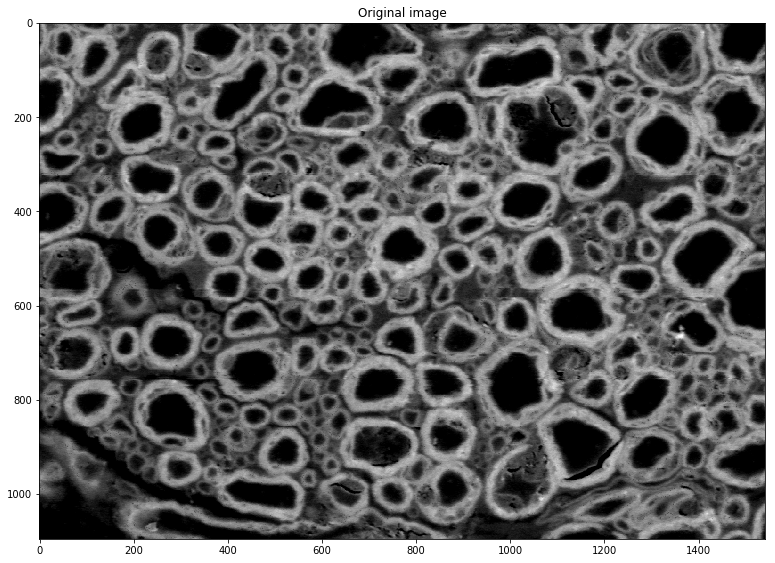

In [82]:
plt.figure(figsize=(13,10))
plt.title('Original image')
plt.imshow(imorg, cmap='gray')
plt.show();

3.3. Display segmentation result (axons in yellow, myelin in green):

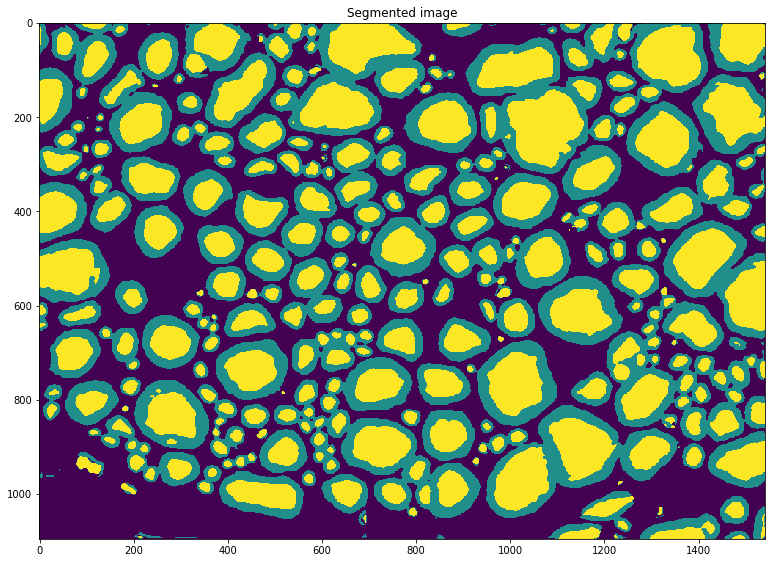

In [83]:
plt.figure(figsize=(13,10))
plt.title('Segmented image')
plt.imshow(imads)
plt.show();

3.4. Display the segmentation result overlaid on the sample image:

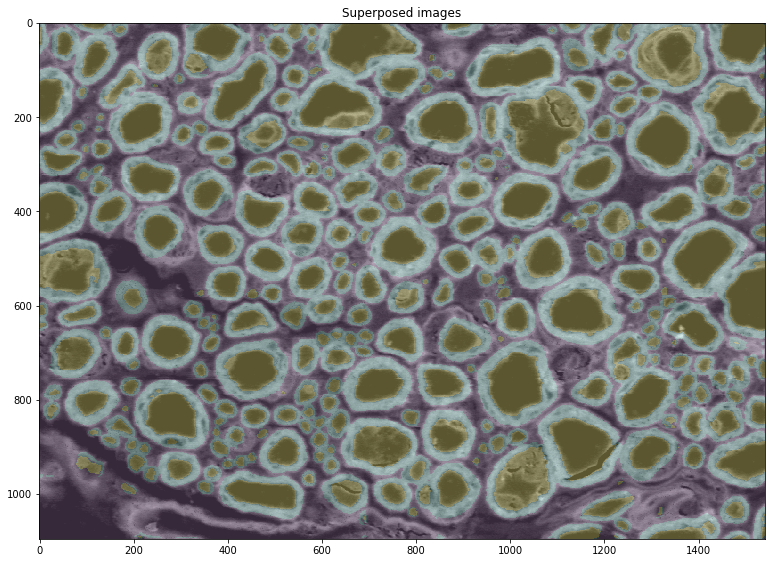

In [84]:
plt.figure(figsize=(13,10))
plt.title('Superposed images')
plt.imshow(imorg, cmap='gray', alpha=0.8)
plt.imshow(imads, cmap='viridis', alpha=0.2)

# 4) Segmentation metrics extraction

4.1. Import the segmentation result and the gold standard mask:

In [85]:
mask = imread(path_testing + '/mask.png', flatten=True)
pred = imread(path_testing + '/AxonDeepSeg.png', flatten=True)

4.2. Get the axon and myelin masks from the 3-label masks:

In [86]:
gt_axon = mask > 200
gt_myelin = np.logical_and(mask >= 50, mask <= 200)

pred_axon = pred > 200
pred_myelin = np.logical_and(pred >= 50, pred <= 200)

4.3. Compute the axon and myelin Dice similarity metrics and display the results:

In [87]:
dice_axon = pw_dice(pred_axon, gt_axon)
dice_myelin = pw_dice(pred_myelin, gt_myelin)

print 'Dice for Axon : ' + str(dice_axon)
print 'Dice for myelin : ' + str(dice_myelin)

Dice for Axon : 0.924425555293
Dice for myelin : 0.838870978581
